# Deep Learning 2025 - Assignment 4: Emojify with Recurrent Neural Network
Instructed by Ali Salar (ali.salar@oulu.fi)

## Outline
#### In this assignment, you will implement an Emojify Model. Through the implementation, you will:
* Basics of PyTorch for deep learning model building and training.
* Basics of Recurrent Neural Networks (RNNs) and Long Short-Term Memory (LSTM) networks.
* Understanding one-hot encoding for words and word embeddings (pre-trained GloVe vectors).
* Training an LSTM model with:
    * One-hot vectors.
    * Pre-trained word embeddings.
* Evaluating models using accuracy, loss curves, and generalization to unseen words.

#### <span style="color:blue">Tasks & grading</span> (<span style="color:green">10 points</span>)

* **Part 1: Importing libraries, checking if CUDA is available, and downloading the dataset and Glove word embedding**
* **Part 2: Construct the model (<span style="color:green">5.5 points</span>)**
  * 2.1 Construct the model and implement its forward propagation (<span style="color:green">4 points</span>)
  * 2.2 Construct Pre-trained GloVe Embedding Layer for the LSTM Model (<span style="color:green">1 point</span>)
  * 2.3 Instantiate the LSTM Model (<span style="color:green">0.5 points</span>)
* **Part 3: Training and evaluation of your model (<span style="color:green">3 points</span>)**
  * 3.1 Setting up the loss function and optimizer (<span style="color:green">1 point</span>)
  * 3.2 Training the model and evaluating it on the test set (<span style="color:green">2 points</span>)
* **Part 4: Emojify using GloVe Embedding and LSTM (<span style="color:green">1.5 points</span>)**
  * 4.1 Set the embedding to GloVe
  * 4.2 Initialise the LSTM model and train the model
  * 4.3 Evaluate your model on your sentences (<span style="color:green">1.5 points</span>)

#### <span style="color:blue">Emojify</span>
Your task is to build and train an emoji prediction model which takes a short sentence as input and outputs the most suitable emoji from the five predefined emoji below:
* ❤️ (0) — love or affection
* ⚾ (1) — sports-related
* 😂 (2) — happiness
* 😞 (3) — sadness
* 🍴 (4) — food related

Example:
* Input sentence: "I love you";                                 Output emoji: ❤️
* Input sentence: "Let's play baseball"                         Output emoji: ⚾
* Input sentence: "She is sad"                                  Output emoji: 😞
* Input sentence: "He enjoys dancing"                           Output emoji: 😂
* Input sentence: "I want to eat at the university restaurant"  Output emoji: 🍴

In this task, the maximum number of words in a sentence is set to 8 due to the limited computational resources. It means if your sentence exceeds the maximum length, it will be truncated, and if it has fewer words, the remaining space will be filled with zero padding.

Example:
* Input: "I love you" → "I, love, you, zero-pad, zero-pad, zero-pad, zero-pad, zero-pad"
* Input: "I want to play football with my friends this afternoon" → "I, want, to, play, football, with, my, friends"

The dataset contains:
* 132 training sentences with labels (train_emoji.csv)
* 56 testing sentences with labels (test_emoji.csv)

#### <span style="color:blue">Introduction to PyTorch</span>
PyTorch is an open-source deep learning framework widely used for building and training neural networks ([Learn more about PyTorch here](https://docs.pytorch.org/tutorials/)). It offers:
* Dynamic computation graphs — making debugging and experimentation easier.
* GPU acceleration — for faster training using CUDA.
* Rich ecosystem — supporting computer vision, natural language processing, and more.
In this assignment, you will use PyTorch to train a Long Short-Term Memory (LSTM) model for text-based emoji prediction.

#### <span style="color:blue">Introduction to LSTM</span>
LSTM is a type of recurrent neural network (RNN) designed to handle sequential data and overcome the vanishing gradient problem. It is well-suited for NLP tasks like sentiment analysis, text classification, and language modeling.
Key properties:
* Memory cells — store relevant information for long periods.
* Gates — control how information is added, removed, or passed through.
* Context-awareness — understands the order of words in a sentence.

In **Fig. 1**, we show the LSTM architecture:
![LSMT.png](attachment:fa2f920b-2002-46fc-b0d7-2db9608dec4e.png)
![LSTM1.gif](attachment:b4e2489a-f45b-44de-b8d1-1f8b7ac9fc61.gif)
![LSTM2.gif](attachment:10521880-6d3b-4eb0-a1c0-706bd7f4c8f5.gif)
![LSTM3.gif](attachment:95aaa7bb-76f8-46b8-99ad-f83546401972.gif)
![LSTM4.gif](attachment:34c586b4-9dcf-4ae7-90ba-35233fd51137.gif)
<center> <strong> <font size="3" color="blue"> Figure 1. LSTM architecture </font> </strong> </center>

#### <span style="color:blue">Word Embeddings and Representation Methods</span>
![compare.png](attachment:f1940ad1-d662-4846-9940-d97066120e9f.png)
<center> <strong> <font size="3" color="blue"> Figure 2. One-Hot vector Vs word embedding </font> </strong> </center>

When we train models on text, we must first convert words into numbers — because neural networks work with numerical data, not raw text. Two common ways to do this are one-hot encoding and word embeddings.

##### One-Hot Vectors:
Each word is represented as a very long vector where only one position is 1 (indicating the word’s index in the vocabulary) and all other positions are 0. Fig. 2 shows how one-hot encoding represents each word as an isolated vector with no notion of similarity.

Advantages:
* Simple to implement.
* No need for pre-training.

Disadvantages:
* Very high memory usage for large vocabularies.
* Cannot capture meaning or similarity between words (e.g., “happy” and “joy” are as different as “happy” and “table” in one-hot space).
* Performs poorly on unseen words — if the word was not in training data, the model knows nothing about it.

##### Word Embeddings (e.g., GloVe [1]):
Represent each word as a dense vector of a smaller dimension, where similar words have similar vector representations (check Fig. 2).

GloVe (Global Vectors for Word Representation) is a popular pre-trained embedding trained on billions of words from large text corpora.

Advantages:
* Much smaller dimensionality → more efficient storage and computation.
* Captures semantic relationships (e.g., vector("king") - vector("man") + vector("woman") ≈ vector("queen")).
* Works better on small datasets because the embeddings are already trained on huge corpora.
* Can handle unseen or rare words better if they are in the pre-trained vocabulary.

Disadvantages:
* Requires downloading and storing the pre-trained file.
* Fixed embeddings may not adapt perfectly to the specific task (although they can be fine-tuned).

[1] Pennington J, Socher R, Manning CD. Glove: Global vectors for word representation. InProceedings of the 2014 conference on empirical methods in natural language processing (EMNLP).

#### <span style="color:blue">Hints</span>
* To find the place where you have to insert your solution, hit Crtl + F and search for **TODO:**. You are **NOT** supposed to modify the code of other parts.
* **Be careful with the shape** of your tensors (e.g. the weights and gradients) in your implementation. Double-check and make sure that the dimensions match the computations, especially in the case of matrix multiplication.
* You can check the correctness of your code by comparing your intermediate outputs with the provided **<span style="color:green">reference results</span>**. **Please remember to do this in every step in order to avoid cumulating errors in your implementation.**

#### Environment
Python 3, numpy, matplotlib, csv, timeit, torch

## <span style="color:blue">Part 1: Importing libraries, checking if CUDA is available, and downloading the dataset and Glove word embedding</span>
**You don't need to change any of the code in this part!**

In [1]:
!pip install emoji==2.14.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 12.2 MB/s eta 0:00:00


In [2]:
import os
import random
import timeit
import csv
import numpy as np
import matplotlib.pyplot as plt

import emoji

import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader

Showing emojies (❤️, ⚾, 😂, 😞, 🍴):

In [3]:
emoji_dictionary = {"0": ":red_heart:",
                    "1": ":baseball:",
                    "2": ":face_with_tears_of_joy:",
                    "3": ":disappointed_face:",
                    "4": ":fork_and_knife:"}

def label_to_emoji(label):
    return emoji.emojize(emoji_dictionary[str(label)])

In [4]:
label_to_emoji(3)

'😞'

### <span style="color:blue">Checking the availability of the GPU<span>

In [5]:
train_on_GPU = torch.cuda.is_available()
if not train_on_GPU:
    print('CUDA is not available. Training on CPU ...')
else:
    print('CUDA is available! Training on GPU ...')
    print(torch.cuda.get_device_properties('cuda'))

CUDA is available! Training on GPU ...
_CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15095MB, multi_processor_count=40, uuid=d00990fa-adee-052e-1b08-f2bd117a7698, pci_bus_id=0, pci_device_id=4, pci_domain_id=0, L2_cache_size=4MB)


Initialize Random Seeds to Ensure Reproducibility

In [6]:
def initialize_seed(seed):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True

initialize_seed(0)

### <span style="color:blue">Downloading the text dataset and Glove word embedding from OneDrive<span>
Installing first [onedrivedownloader](https://pypi.org/project/onedrivedownloader/) package for downloading the data.

In [7]:
!pip install onedrivedownloader

Downloading the text dataset.

In [8]:
from onedrivedownloader import download

link = 'https://unioulu-my.sharepoint.com/:u:/g/personal/asalar24_univ_yo_oulu_fi/EQebkvyHFTNNh82R8ac5cEYBeWg3Rv-HefR7OCBxRW8O6A?e=m1Qvdy'

if not os.path.exists('./data_hw4/Data_Glove'):
    print('Downloading data')
    download(link, filename="./Data_Glove.zip", unzip=True, unzip_path='./data_hw4/Data_Glove')
else:
    print('The data is already downloaded!')

100%|██████████| 69.9M/69.9M [00:03<00:00, 18.4MiB/s]


Unzipping file...


Extracting files: 100%|██████████| 3/3 [00:01<00:00,  1.91it/s]


### <span style="color:blue">Defining a function to load GloVe Embeddings<span>

In [9]:
def read_glove_vecs(glove_file):
    with open(glove_file, 'r', encoding='UTF-8') as f:
        words = set()
        word_to_vec_map = {}
        for line in f:
            line = line.strip().split()
            curr_word = line[0]
            words.add(curr_word)
            word_to_vec_map[curr_word] = np.array(line[1:], dtype=np.float64)

        i = 1
        words_to_index = {}
        index_to_words = {}
        for w in sorted(words):
            words_to_index[w] = i
            index_to_words[i] = w
            i = i + 1
    return words_to_index, index_to_words, word_to_vec_map

PATH = os.path.join('data_hw4', 'Data_Glove')
word_to_index, index_to_word, word_to_vec_map = read_glove_vecs(os.path.join(PATH, 'glove.6B.50d.txt'))

In [11]:
print('336275 (index) to word: ', index_to_word[336275])
print('soccer (word) to index: ', word_to_index['soccer'])
print('soccer (word) to vector: ', word_to_vec_map['soccer'])
print('vector size: ', word_to_vec_map['soccer'].shape)

336275 (index) to word:  soccer
soccer (word) to index:  336275
soccer (word) to vector:  [-1.0661    0.72522  -1.0689    0.96838  -0.38738  -0.97275  -1.0004
  0.16583  -0.48563   0.050147  0.89009  -0.20057  -0.73149   0.30664
  1.486    -0.49356   0.50783   0.96064  -1.3047   -0.10472  -1.0071
  0.20752  -0.38318   1.1873   -0.87305  -1.4268    0.058645  0.01228
 -0.7275   -0.12289   2.1284    1.4537   -0.3187   -0.2742   -0.28075
  0.79159  -0.19887   0.15982  -0.28333  -1.1332   -0.022388 -0.097448
  0.2837    0.24491   0.57839   0.78491  -0.21026   0.65929   0.13847
 -0.87412 ]
vector size:  (50,)


### <span style="color:blue">Defining functions for preprocessing the training & testing data<span>
([Learn more about PyTorch Dataset and Dataloaders](https://docs.pytorch.org/tutorials/beginner/basics/data_tutorial.html))

Map sentences to word index sequences (padded/truncated to max_seqlen).

In [12]:
def sentences_to_indices(X, word_to_index, max_seqlen):
    m = X.shape[0] # number of training examples

    # Initialize X_indices as a numpy matrix of zeros and the correct shape (≈ 1 line)
    X_indices = np.zeros((m, max_seqlen))

    for i in range(m):
        # Convert the ith training sentence into lower case and split it into words. You should get a list of words.
        sentence_words = X[i].lower().split()

        j = 0

        for w in sentence_words:
            # if w exists in the word_to_index dictionary
            if w in word_to_index:
                # Set the (i,j)th entry of X_indices to the index of the correct word.
                X_indices[i, j] = word_to_index[w]
                # Increment j to j + 1
                j = j + 1
            if j == max_seqlen:
                break
    return X_indices

In [13]:
max_seqlen = 8 # The maximum number of words you allow in a sentence for the model input
print(sentences_to_indices(np.array(['Goey does not share food !']), word_to_index, max_seqlen))

[[1.63659e+05 1.26848e+05 2.64550e+05 3.27482e+05 1.51204e+05 1.00000e+00
  0.00000e+00 0.00000e+00]]


In [14]:
class EmojiDataset(Dataset):
    def __init__(self, root, max_seqlen):
        self.root = root

        sentences = []
        labels = []

        with open (root) as csvDataFile:
            csvReader = csv.reader(csvDataFile)
            next(csvReader)
            for row in csvReader:
                sentences.append(row[0])
                labels.append(row[1])

            sentences = np.asarray(sentences)
            labels = np.asarray(labels, dtype=int)

        self.sentences_to_indices = sentences_to_indices(sentences, word_to_index, max_seqlen)
        self.labels = labels

    def __getitem__(self, ix):
        sentence = self.sentences_to_indices[ix]
        label = self.labels[ix]
        return torch.tensor(sentence), torch.tensor(label)

    def __len__(self):
        return len(self.sentences_to_indices)

In [15]:
train_data = EmojiDataset(os.path.join(PATH, 'train_emoji.csv'), max_seqlen=max_seqlen)
print("Train data shape:", len(train_data))
test_data = EmojiDataset(os.path.join(PATH, 'test_emoji.csv'), max_seqlen=max_seqlen)
print("Test data shape:", len(test_data))

batch_size = 8
trainloader = DataLoader(train_data, batch_size=batch_size, shuffle=False)
testloader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

one_batch = next(iter(trainloader))
print("Shape of one batch:", one_batch[0].size(), one_batch[1].size())

Train data shape: 132
Test data shape: 56
Shape of one batch: torch.Size([8, 8]) torch.Size([8])


## <span style="color:blue">Part 2: Construct the model (<span style="color:green">6.5 points</span>)<span>
**Now, let's get your hands dirty.**
![model.png](attachment:7d09c876-56ce-432b-b8b9-8965359fb39f.png)
<center> <strong> <font size="3" color="blue"> Figure 3. Model architecture </font> </strong> </center>

### <span style="color:blue">2.1 Construct the model and implement its forward propagation (<span style="color:green">4 points</span>)<span>

As shown in Fig. 3, our neural network is an LSTM-based sequence classifier.
It contains:
* An embedding layer (which can use either pre-trained GloVe vectors or one-hot encoding).
* An LSTM layer to capture temporal dependencies in the input sequence.
* A fully connected layer that maps the LSTM output to the emoji classes.

To simplify things, we will always use batch-first mode in our LSTM and fix the hidden size to 64 and number of layers to 2.
Be aware that while you can change the hidden size or the number of LSTM layers, the output layer must always have 5 neurons because we are classifying sentences into 5 different emojis.

In the following, you will have to construct the missing parts of the network.

In [16]:
class LSTM(nn.Module):
    def __init__(self,
                 input_size,
                 hidden_size,
                 output_size,
                 embedding,
                 emb_pretrained_weight,
                 num_layers,
                 dropout):
        super(LSTM, self).__init__()

        self.input_size = input_size
        self.num_layers = num_layers
        self.embedding = embedding
        self.hidden_size = hidden_size

        # TODO: Initialize embedding layer (1 point)
        # If using GloVe (embedding=True), set emb_dimension to 50
        # and load the pre-trained weights into nn.Embedding.
        if self.embedding:
            emb_dimention = 50
            self.word_embeds = nn.Embedding(emb_pretrained_weight.size(0), emb_dimention)
            self.word_embeds.weight.data.copy_(emb_pretrained_weight)

        # If using one-hot encoding (embedding=False), set emb_dimension to input_size.
        elif not self.embedding:
            emb_dimention = self.input_size

        # TODO: Define the LSTM layer (1 point)
        # Use emb_dimension as input_size for the LSTM
        # batch_first=True, and dropout as given
        self.lstm = nn.LSTM(input_size=emb_dimention,
                            hidden_size=self.hidden_size,
                            num_layers=self.num_layers,
                            batch_first=True,
                            dropout=dropout)

        # TODO: Define the fully connected (output) layer (0.5 points)
        # Hint: hidden_size is the input dimension, output_size is the number of classes
        self.fc = nn.Linear(self.hidden_size, output_size)

    def forward(self, x, prev_state):
        # TODO: Convert x to embeddings if embedding=True (use x.long() as input here) (0.5 points)
        # Otherwise, convert x to one-hot vectors using self.one_hot_vector()
        if self.embedding:
            x = self.word_embeds(x.long())
        elif not self.embedding:
            x = self.one_hot_vector(x)

        # TODO: Pass x through the LSTM (0.5 points)
        out, _ = self.lstm(x, prev_state)

        # TODO: Pass the last timestep's output through the fully connected layer (0.5 points)
        # Return the final predictions
        out = out[:, -1, :]
        yhat = self.fc(out)
        return yhat

    def one_hot_vector(self, x):
        ohv = torch.zeros((x.size(0), x.size(1), self.input_size)).cuda()
        for i, _ in enumerate(x):
            for j, c in enumerate(x[i]):
                ohv[i, j, int(c.item())]=1
        return ohv

    def init_state(self, batch_size=1):
        if train_on_GPU:
            ht = torch.zeros((self.num_layers, batch_size, self.hidden_size)).cuda()
            ct = torch.zeros((self.num_layers, batch_size, self.hidden_size)).cuda()
        else:
            ht = torch.zeros((self.num_layers, batch_size, self.hidden_size))
            ct = torch.zeros((self.num_layers, batch_size, self.hidden_size))
        return (ht, ct)

### <span style="color:blue">2.2 Construct Pre-trained GloVe Embedding Layer for the LSTM Model (<span style="color:green">1 point</span>)<span>
![emb.png](attachment:3572da04-4070-45c3-a08b-a5b2292f76d3.png)
<center> <strong> <font size="3" color="red"> Figure 4. Word embedding </font> </strong> </center>

Based on Fig. 4, we create a pre-trained embedding layer for our LSTM model using GloVe word vectors.
It does the following:
1. Creates an embedding matrix of size (vocab_size, 50) where each row corresponds to a word in our vocabulary.
2. Looks up each word in the word_to_vec_map dictionary to retrieve its 50-dimensional GloVe vector.
3. Fills the embedding matrix with these vectors so it can be directly loaded into PyTorch’s nn.Embedding layer.

In the following, you will complete the code to initialize the embedding matrix and populate it with pre-trained vectors based on the vocabulary mapping.

In [17]:
def pretrained_embedding_layer(vocab_size, word_to_vec_map, word_to_index):
    # TODO: Initialize an embedding matrix of shape (vocab_size, 50) (0.25 points)
    # Hint: use np.zeros and specify dtype=float
    emb_matrix = np.zeros((vocab_size, 50), dtype=float)

    # TODO: Loop over all words and their corresponding indices in word_to_index (0.5 points)
    # For each word, assign the correct GloVe vector to the corresponding row in the embedding matrix
    for word, index in word_to_index.items():
        emb_matrix[index, :] = word_to_vec_map[word]
    # TODO: Convert the embedding matrix to a PyTorch tensor and return it (0.25 points)
    return torch.tensor(emb_matrix, dtype=torch.float64)

In [18]:
vocab_size = len(word_to_index) + 1
print('vocab size: ', vocab_size)
pretrained_weight = pretrained_embedding_layer(vocab_size, word_to_vec_map, word_to_index)
print('pretrained weight shape: ', pretrained_weight.shape)
print('pretrained weight: ', pretrained_weight)

vocab size:  400001
pretrained weight shape:  torch.Size([400001, 50])
pretrained weight:  tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.5840,  0.3903,  0.6528,  ..., -1.2338,  0.4672,  0.7886],
        [-1.0588,  0.2695,  0.9463,  ...,  0.3114,  0.7984,  0.2039],
        ...,
        [ 0.3230,  0.3231, -0.3136,  ...,  1.8267, -0.4305, -1.1958],
        [ 0.3871,  0.0984, -0.7386,  ...,  1.0611, -0.2125, -0.6551],
        [-0.0198, -0.0401,  0.8689,  ...,  0.2371, -0.1819,  0.2477]],
       dtype=torch.float64)


**<span style="color:green">Reference results:</span>** <br>
vocab size:  400001<br>
pretrained weight shape:  torch.Size([400001, 50])<br>
pretrained weight:  tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],<br>
        [-0.5840,  0.3903,  0.6528,  ..., -1.2338,  0.4672,  0.7886],<br>
        [-1.0588,  0.2695,  0.9463,  ...,  0.3114,  0.7984,  0.2039],<br>
        ...,<br>
        [ 0.3230,  0.3231, -0.3136,  ...,  1.8267, -0.4305, -1.1958],<br>
        [ 0.3871,  0.0984, -0.7386,  ...,  1.0611, -0.2125, -0.6551],<br>
        [-0.0198, -0.0401,  0.8689,  ...,  0.2371, -0.1819,  0.2477]],<br>
       dtype=torch.float64)

Defining model paths for GloVe or one-hot encoding

In [19]:
checkpoint_dir = "./checkpoints"

# Create the folder if it doesn't exist
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)
    print(f"Folder '{checkpoint_dir}' created.")
else:
    print(f"Folder '{checkpoint_dir}' already exists.")

def is_glove_emb(emb_flag=False):
    embedding = emb_flag
    if embedding == True:
        model_PATH = os.path.join(checkpoint_dir, 'LSTM_emogify_glove.pth')
    elif embedding == False:
        model_PATH = os.path.join(checkpoint_dir, 'LSTM_emogify_one_hot_vector.pth')
    return embedding, model_PATH

Folder './checkpoints' created.


### <span style="color:blue">2.3 Instantiate the LSTM Model (<span style="color:green">0.5 points</span>)<span>

In this section, you will create an instance of the LSTM model we defined earlier.
The model takes the following parameters:
* input_size — The vocabulary size.
* hidden_size — Number of units in the LSTM hidden layer (we use 64 here).
* output_size — Number of output classes.
* embedding — Boolean flag (we defined a function earlier).
* emb_pretrained_weight — Pre-trained GloVe embedding matrix.
* num_layers — Number of stacked LSTM layers (we use 2).
* dropout — Dropout probability for regularization.

Once the model is created, if a GPU is available, we move it to CUDA for faster training.

In [20]:
one_hot_embedding, model_PATH = is_glove_emb(False)
# TODO: Create an instance of the LSTM model (0.5 points)
model = LSTM(input_size = vocab_size,
             hidden_size = 64,
             output_size = 5,
             embedding = one_hot_embedding,
             emb_pretrained_weight = pretrained_weight,
             num_layers = 2,
             dropout = 0.5)
if train_on_GPU:
    model.cuda()
    print('\n model can be trained on gpu')


 model can be trained on gpu


## <span style="color:blue">Part 3: Training and evaluation of your model (<span style="color:green">3 points</span>)<span>

### <span style="color:blue">3.1 Setting up the loss function and optimizer (<span style="color:green">1 point</span>)<span>
In this section, you will:
1. Define the loss function for classification.
2. Define the optimizer to update just the trainable parameters.

In [21]:
epochs = 15

params = [p for p in model.parameters() if p.requires_grad == True]

# TODO: Define the loss function for training (0.5 points)
criterion = nn.CrossEntropyLoss()

# TODO: Define the Adam optimizer for the trainable parameters. Learning rate is 1e-3 (0.5 points)
optimizer = optim.Adam(params, lr=1e-3)

lr_scheduler = optim.lr_scheduler.StepLR(optimizer=optimizer, step_size=10, gamma=0.8)

In [22]:
def count_all_parameters(model):
    return sum(p.numel() for p in model.parameters())
def count_learnabel_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [23]:
print('All network parameters: ', count_all_parameters(model))
print('Learnable parameters: ', count_learnabel_parameters(model))

All network parameters:  102450757
Learnable parameters:  102450757


**<span style="color:green">Reference results:</span>** <br>
All network parameters:  102450757<br>
Learnable parameters:  102450757<br>

### <span style="color:blue">3.2 Training the model and evaluating it on the test set (<span style="color:green">2 points</span>)<span>
In this section, you will:
1. Complete the training loop by filling in the missing steps: zeroing gradients, computing the loss, performing backpropagation, and updating model parameters.
2. Complete the testing loop by computing the loss.
* Understand how training and evaluation work in PyTorch.

In [24]:
best_accuracy = 0

epoch_losses = []
epoch_accuracy = []
epoch_lrs = []

def train(epoch):
    epoch_loss = 0
    correct = 0
    total = 0

    model.train()
    for batch_idx, (X, Y) in enumerate(trainloader):

        if train_on_GPU:
            X, Y = X.cuda(), Y.cuda()

        # initialise model's state and perform forward-prop
        prev_state = model.init_state(batch_size=X.shape[0])
        out = model(X, prev_state)

        # TODO: Zero the gradients before backprop (0.5 points)
        optimizer.zero_grad()

        # TODO: Compute the loss (use Y.long()) (0.25 points)
        loss = criterion(out, Y.long())

        # TODO: Backpropagate the loss (0.5 points)
        loss.backward()

        # TODO: Update model parameters (0.5 points)
        optimizer.step()

        epoch_loss += loss.item()
        _, predicted = torch.max(out, 1)
        total += Y.size(0)
        correct += (predicted == Y).sum().item()

    print('Epoch: {} \t Training Loss: {:.3f} \t Training Accuracy: {:.3f}'.format(epoch+1, epoch_loss/(batch_idx+1), 100.*correct/total))

def test(epoch):

    epoch_loss = 0
    correct = 0
    total = 0

    model.eval()
    with torch.no_grad():
        for batch_idx, (X, Y) in enumerate(testloader):

            if train_on_GPU:
                X, Y = X.cuda(), Y.cuda()

            # initialise model's state and perform forward-prop
            prev_state = model.init_state(batch_size=X.shape[0])
            out = model(X, prev_state)

            # TODO: Compute the loss (use Y.long()) (0.25 points)
            loss = criterion(out, Y.long())

            epoch_loss += loss.item()
            _, predicted = torch.max(out, 1)
            total += Y.size(0)
            correct += (predicted == Y).sum().item()

    acc = 100.*correct/total
    epoch_losses.append(epoch_loss/(batch_idx+1))
    epoch_accuracy.append(acc)
    print('Epoch: {} \t Test Loss: {:.3f} \t Test Accuracy: {:.3f}'.format(epoch+1, epoch_loss/(batch_idx+1), acc))

    # save model if test accuracy has increased
    global best_accuracy
    if acc > best_accuracy:
        print('Test accuracy increased ({:.3f} --> {:.3f}). saving model ...'.format(best_accuracy, acc))
        torch.save(model.state_dict(), model_PATH)
        best_accuracy = acc

In [25]:
print('==> Start Training ...')
for epoch in range(epochs):
    start = timeit.default_timer()
    train(epoch)
    test(epoch)
    lr_scheduler.step()
    epoch_lrs.append(lr_scheduler.get_lr()[0])
    stop = timeit.default_timer()
    print('time: {:.3f}'.format(stop - start))
print('==> End of training ...')

==> Start Training ...
Epoch: 1 	 Training Loss: 1.591 	 Training Accuracy: 28.788
Epoch: 1 	 Test Loss: 1.555 	 Test Accuracy: 32.143
Test accuracy increased (0.000 --> 32.143). saving model ...


/usr/local/lib/python3.12/dist-packages/torch/optim/lr_scheduler.py:523: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  _warn_get_lr_called_within_step(self)


time: 4.340
Epoch: 2 	 Training Loss: 1.570 	 Training Accuracy: 28.788
Epoch: 2 	 Test Loss: 1.531 	 Test Accuracy: 32.143
time: 3.111
Epoch: 3 	 Training Loss: 1.558 	 Training Accuracy: 28.788
Epoch: 3 	 Test Loss: 1.524 	 Test Accuracy: 32.143
time: 2.837
Epoch: 4 	 Training Loss: 1.547 	 Training Accuracy: 31.818
Epoch: 4 	 Test Loss: 1.520 	 Test Accuracy: 32.143
time: 2.535
Epoch: 5 	 Training Loss: 1.528 	 Training Accuracy: 31.818
Epoch: 5 	 Test Loss: 1.499 	 Test Accuracy: 30.357
time: 2.556
Epoch: 6 	 Training Loss: 1.431 	 Training Accuracy: 33.333
Epoch: 6 	 Test Loss: 1.440 	 Test Accuracy: 28.571
time: 2.566
Epoch: 7 	 Training Loss: 1.222 	 Training Accuracy: 44.697
Epoch: 7 	 Test Loss: 1.475 	 Test Accuracy: 26.786
time: 2.774
Epoch: 8 	 Training Loss: 1.051 	 Training Accuracy: 53.788
Epoch: 8 	 Test Loss: 1.675 	 Test Accuracy: 23.214
time: 2.553
Epoch: 9 	 Training Loss: 0.905 	 Training Accuracy: 60.606
Epoch: 9 	 Test Loss: 1.738 	 Test Accuracy: 30.357
time: 2.

**<span style="color:green">Reference results:</span>** <br>
**<span style="color:green">Your final results should not always be similar to what I showed in code, because the parameters are initialized with random values in the beginning. But the trend should be similar</span>** <br>

Show accuracy, loss, and learning rate plots

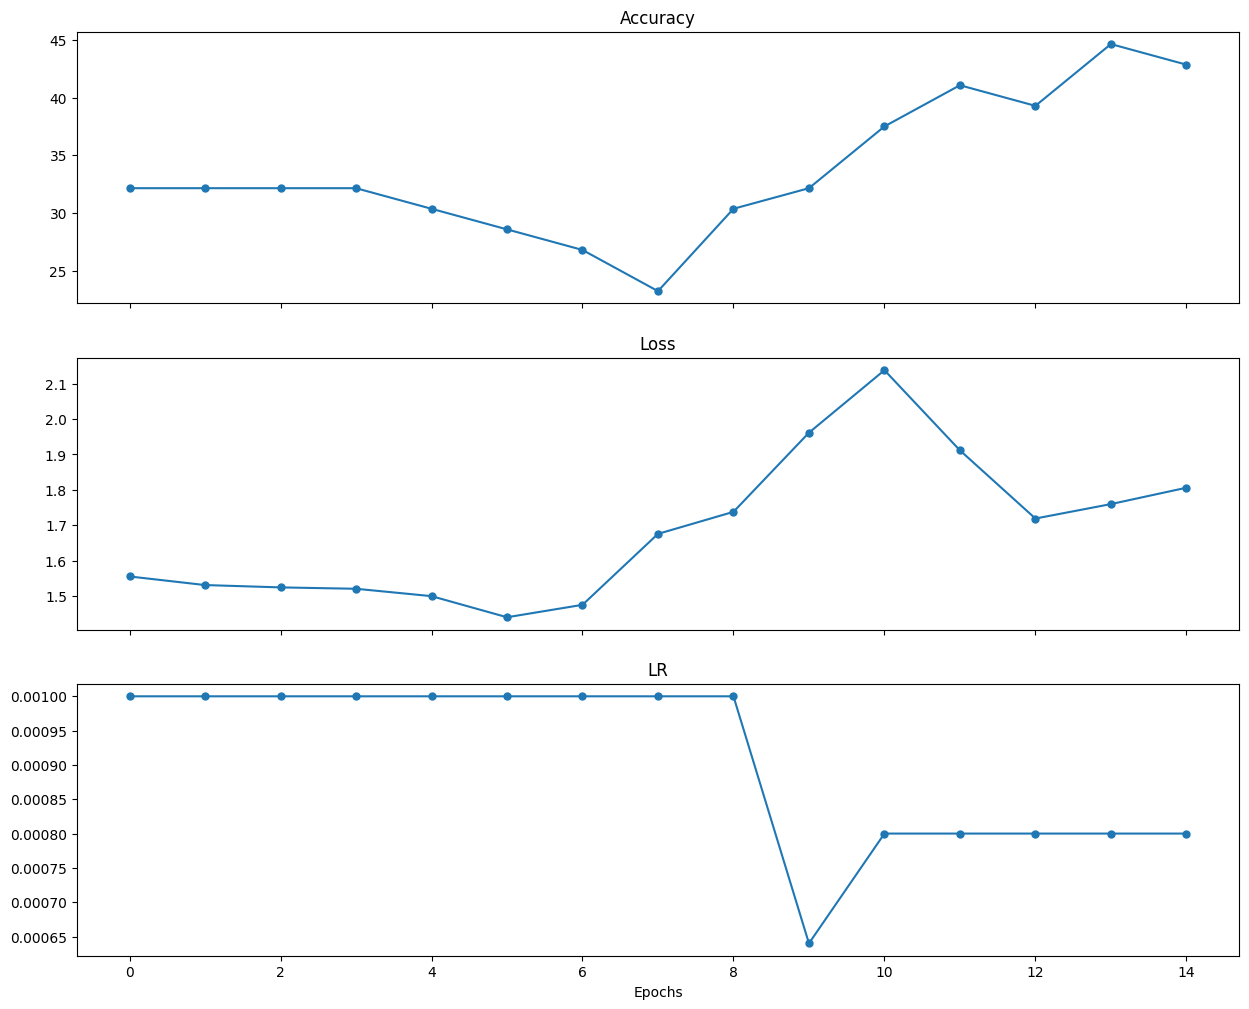

In [26]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(15, 12))
ax1.plot(epoch_accuracy, marker="o", markersize=5)
ax1.set_title("Accuracy")
ax2.plot(epoch_losses, marker="o", markersize=5)
ax2.set_title("Loss")
ax3.plot(epoch_lrs, marker="o", markersize=5)
ax3.set_title("LR")
plt.xlabel("Epochs")
plt.show()
plt.close()

## <span style="color:blue">Part 4: Emojify using GloVe Embedding and LSTM (<span style="color:green">1.5 points</span>)<span>

### <span style="color:blue">4.1 Set the embedding to GloVe<span>

In [27]:
glove_embedding, model_PATH = is_glove_emb(True)

### <span style="color:blue">4.2 Initialise the LSTM model and train the model<span>

In [28]:
# TODO: use the previously defined model here
model = LSTM(input_size = vocab_size,
             hidden_size = 64,
             output_size = 5,
             embedding = glove_embedding,
             emb_pretrained_weight = pretrained_weight,
             num_layers = 2,
             dropout = 0.5)
if train_on_GPU:
    model.cuda()
    print('\n model can be trained on gpu')


 model can be trained on gpu


In [31]:
epochs = 25

if glove_embedding == True:
    for param in model.word_embeds.parameters():
        param.requires_grad = False # Freezing embeddings if we want to use GloVe weights
params = [p for p in model.parameters() if p.requires_grad == True]

# TODO: use the previously defined optimizer here
optimizer = optim.Adam(params, lr=1e-3)

lr_scheduler = optim.lr_scheduler.StepLR(optimizer=optimizer, step_size=10, gamma=0.8)

In [32]:
print('All network parameters: ', count_all_parameters(model))
print('Learnable parameters: ', count_learnabel_parameters(model))

All network parameters:  20063351
Learnable parameters:  63301


**<span style="color:green">Reference results:</span>** <br>
All network parameters:  20063351<br>
Learnable parameters:  63301<br>

In [33]:
best_accuracy = 0

epoch_losses = []
epoch_accuracy = []
epoch_lrs = []

print('==> Start Training ...')
for epoch in range(epochs):
    start = timeit.default_timer()
    train(epoch)
    test(epoch)
    lr_scheduler.step()
    epoch_lrs.append(lr_scheduler.get_lr()[0])
    stop = timeit.default_timer()
    print('time: {:.3f}'.format(stop - start))
print('==> End of training ...')

==> Start Training ...
Epoch: 1 	 Training Loss: 1.586 	 Training Accuracy: 28.788
Epoch: 1 	 Test Loss: 1.551 	 Test Accuracy: 32.143
Test accuracy increased (0.000 --> 32.143). saving model ...
time: 0.231
Epoch: 2 	 Training Loss: 1.551 	 Training Accuracy: 29.545
Epoch: 2 	 Test Loss: 1.514 	 Test Accuracy: 33.929
Test accuracy increased (32.143 --> 33.929). saving model ...
time: 0.224
Epoch: 3 	 Training Loss: 1.490 	 Training Accuracy: 36.364
Epoch: 3 	 Test Loss: 1.456 	 Test Accuracy: 30.357
time: 0.060
Epoch: 4 	 Training Loss: 1.344 	 Training Accuracy: 37.879
Epoch: 4 	 Test Loss: 1.291 	 Test Accuracy: 42.857
Test accuracy increased (33.929 --> 42.857). saving model ...
time: 0.205
Epoch: 5 	 Training Loss: 1.141 	 Training Accuracy: 55.303
Epoch: 5 	 Test Loss: 1.201 	 Test Accuracy: 50.000
Test accuracy increased (42.857 --> 50.000). saving model ...
time: 0.219
Epoch: 6 	 Training Loss: 0.984 	 Training Accuracy: 64.394
Epoch: 6 	 Test Loss: 1.131 	 Test Accuracy: 53.57

**<span style="color:green">Reference results:</span>** <br>
**<span style="color:green">Your final results should not always be similar to what I showed in code, because the parameters are initialized with random values in the beginning. But the trend should be similar</span>** <br>

Show accuracy, loss, and learning rate plots

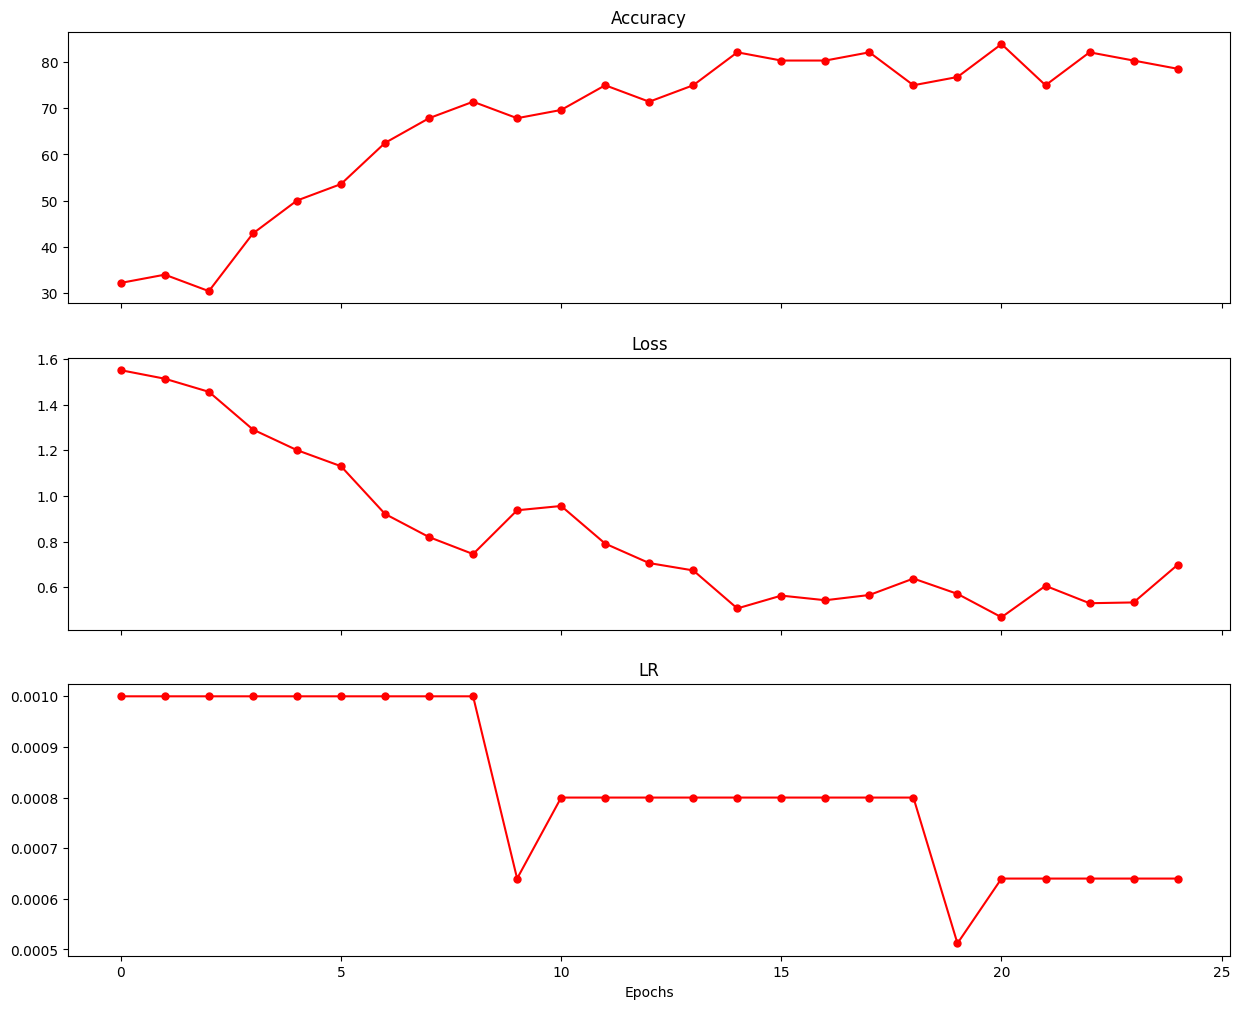

In [34]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(15, 12))
ax1.plot(epoch_accuracy, marker="o", markersize=5, color='red')
ax1.set_title("Accuracy")
ax2.plot(epoch_losses, marker="o", markersize=5, color='red')
ax2.set_title("Loss")
ax3.plot(epoch_lrs, marker="o", markersize=5, color='red')
ax3.set_title("LR")
plt.xlabel("Epochs")
plt.show()

### <span style="color:blue">4.3 Evaluate your model on your sentences (<span style="color:green">1.5 points</span>)<snap>

In [35]:
embedding, model_PATH = is_glove_emb(True)
if train_on_GPU:
    model.load_state_dict(torch.load(model_PATH))
    model.cuda()
    print('\n net can be trained on gpu')
else:
    model.load_state_dict(torch.load(model_PATH, torch.device('cpu')))


 net can be trained on gpu


In [39]:
def generate_emoji(sentence, model):
    sen = sentences_to_indices(np.array([sentence]), word_to_index, max_seqlen)
    if train_on_GPU:
        sen = torch.Tensor(sen).cuda()
    else:
        sen = torch.Tensor(sen)
    first_state = model.init_state(batch_size=1)
    out = model(sen, first_state)
    _, predicted = torch.max(out, 1)
    print("Sentence is: {}, Emoji is: {}".format(sentence, label_to_emoji(predicted.item())))

In [40]:
generate_emoji('joey doesnt share food', model)

Sentence is: joey doesnt share food, Emoji is: 🍴


Discussion Questions:

Why do GloVe embeddings use much less memory and computation time compared to one-hot vectors?

Answer: GloVe embeddings use much less memory because each word is represented by a dense vector of only 50 values, while a one-hot vector must have one dimension for every word in the vocabulary. In our case, the vocabulary is around 400,000 words, so a one-hot vector has 400,000 positions with almost all zeros. This makes it extremely large and inefficient.
With GloVe, every word is mapped to a small, fixed-size vector that captures semantic meaning, so the model can process the input faster and use far less memory. Dense vectors also allow the model to learn patterns more easily because similar words have similar embeddings, which is not the case for one-hot vectors.


Despite training, why might the model still not achieve very high accuracy on new sentences? (Compare they are happy and she is happy)

Answer: Even after training, the model may not reach high accuracy on new sentences because the dataset is very small and contains only a limited set of examples. This means the model cannot fully learn all variations of natural language. For example, the phrases they are happy and she is happy have almost the same meaning, but the training data might contain only one of them. Since LSTM models rely heavily on the patterns they have seen before, they may struggle to generalize to unseen sentence structures or different pronouns.
Another reason is that the model predicts only five emoji classes, so the meaning of some sentences may not fit perfectly into one of the available labels, making the decision harder.


What strategies could you try to improve the model’s accuracy?

Answer: There are several ways to improve accuracy. for example one option is to use a larger and more diverse training dataset so the model can learn richer language patterns. Another strategy is to use more powerful word representations, such as BERT or other contextual embeddings, which understand word meaning based on the entire sentence.
We could also experiment with tuning hyperparameters, such as increasing the hidden size, adding more LSTM layers, or adjusting the learning rate. Regularization methods, like dropout or early stopping, may also help prevent overfitting. Finally, we could apply data augmentation techniques, such as rephrasing sentences or adding synonyms, to give the model more examples to learn from.